In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

In [2]:
grades_df = pd.read_csv("student-mat_pass_fail.csv")
grades_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass/fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,1


In [3]:
X = grades_df.drop(['pass/fail'], axis = 1)
y = grades_df['pass/fail']
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
#One hot encoding categorical variables to be used with PCA and LDA
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols
categorical_cols_encoded = pd.get_dummies(X[categorical_cols])
categorical_cols_encoded
X_encoded = pd.concat([X.drop(categorical_cols, axis=1), categorical_cols_encoded], axis=1)
X_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [5]:
#Standardized data
scaler = StandardScaler()
scaler.fit(X_encoded)
X_standardized = scaler.transform(X_encoded)
X_standardized

array([[ 1.02304645,  1.14385567,  1.36037064, ..., -2.23267743,
         0.70844982, -0.70844982],
       [ 0.23837976, -1.60000865, -1.39997047, ...,  0.44789274,
         0.70844982, -0.70844982],
       [-1.33095364, -1.60000865, -1.39997047, ...,  0.44789274,
         0.70844982, -0.70844982],
       ...,
       [ 3.37704655, -1.60000865, -1.39997047, ..., -2.23267743,
         0.70844982, -0.70844982],
       [ 1.02304645,  0.22923423, -0.47985677, ...,  0.44789274,
         0.70844982, -0.70844982],
       [ 1.80771315, -1.60000865, -1.39997047, ...,  0.44789274,
         0.70844982, -0.70844982]])

In [6]:
#PCA 
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_standardized, y)
X_pca

array([[ 9.89000855e-01, -2.59705054e+00],
       [ 2.12911881e+00, -2.89925552e+00],
       [ 1.31551910e+00, -2.08559283e+00],
       [-3.68959991e+00, -9.80357117e-01],
       [-3.52560439e-01, -2.51181652e+00],
       [-3.26472602e+00,  1.83117608e+00],
       [ 1.78608435e-01,  1.81854405e+00],
       [-3.73638111e-01, -3.78034318e+00],
       [-3.42420357e+00,  1.55878759e+00],
       [-2.91541811e+00,  7.98824550e-01],
       [-3.31548480e+00, -1.70929344e+00],
       [-1.24255391e+00, -1.75754096e+00],
       [-3.07831555e+00,  2.64846708e+00],
       [-1.83873318e+00,  5.74669902e-01],
       [-1.13248849e+00,  3.57181693e-01],
       [-2.38072677e+00,  3.79482059e-02],
       [-3.80095413e+00, -8.74607605e-01],
       [-2.62977831e-01, -3.54139631e+00],
       [ 1.60106876e+00,  1.13604864e+00],
       [-1.43818120e+00,  1.87494310e+00],
       [-2.03200742e+00,  1.77266774e+00],
       [-3.52779459e+00,  1.15464763e+00],
       [-1.44193602e+00,  3.83731498e+00],
       [-5.

In [7]:
pca.explained_variance_ratio_

array([0.08571405, 0.06005644])

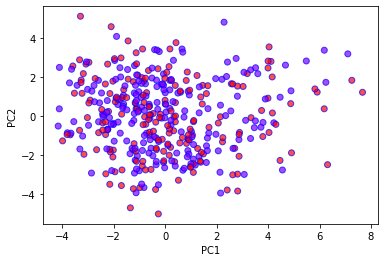

In [8]:
#PCA model graph
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')

In [9]:
X_standardized

array([[ 1.02304645,  1.14385567,  1.36037064, ..., -2.23267743,
         0.70844982, -0.70844982],
       [ 0.23837976, -1.60000865, -1.39997047, ...,  0.44789274,
         0.70844982, -0.70844982],
       [-1.33095364, -1.60000865, -1.39997047, ...,  0.44789274,
         0.70844982, -0.70844982],
       ...,
       [ 3.37704655, -1.60000865, -1.39997047, ..., -2.23267743,
         0.70844982, -0.70844982],
       [ 1.02304645,  0.22923423, -0.47985677, ...,  0.44789274,
         0.70844982, -0.70844982],
       [ 1.80771315, -1.60000865, -1.39997047, ...,  0.44789274,
         0.70844982, -0.70844982]])

In [10]:
#LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_standardized, y)
X_lda

array([[ 1.63269374e+00],
       [ 6.99848373e-01],
       [-2.77668364e+00],
       [ 1.25509391e-01],
       [-5.77430616e-01],
       [-4.16307232e-01],
       [-2.48253083e-01],
       [ 9.46714510e-01],
       [-1.65395983e+00],
       [ 1.23700263e+00],
       [ 2.63439854e-01],
       [-8.05496262e-01],
       [-1.07628441e-01],
       [ 3.88353031e-01],
       [ 1.00444001e+00],
       [-1.10092190e-01],
       [-5.05777130e-01],
       [ 3.57577236e-01],
       [ 4.80567576e-01],
       [-1.38404535e+00],
       [-2.97390571e-01],
       [-1.67509801e+00],
       [ 1.85730578e+00],
       [ 1.97014926e-01],
       [ 8.95220540e-01],
       [-1.30054088e-01],
       [-5.07936794e-01],
       [-2.60682026e+00],
       [-2.25990372e-01],
       [-3.31682911e-01],
       [ 1.22767234e+00],
       [ 3.62970185e-01],
       [ 2.83665755e-01],
       [ 1.34786326e+00],
       [ 5.74748873e-01],
       [-2.19884456e-01],
       [ 7.92816042e-01],
       [ 1.39485920e+00],
       [ 9.2

In [11]:
lda.explained_variance_ratio_

array([1.])

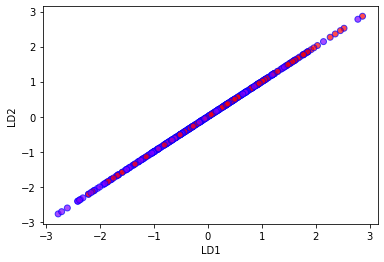

In [12]:
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.scatter(X_lda[:,0], X_lda[:,0], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')

In [13]:
#Function to measure time and performance
def run_randomForest(train_X, test_X, train_y, test_y):
    clf = RandomForestClassifier(n_estimators = 100, random_state = 129, n_jobs = 1)
    clf.fit(train_X, train_y)
    predictions = clf.predict(test_X)
    print("Accuracy on test data: " + str(accuracy_score(test_y, predictions)))

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X_standardized, y, random_state = 129, test_size = 0.2)

In [15]:
%%time
#Normal model
run_randomForest(train_X, test_X, train_y, test_y)

Accuracy on test data: 0.43037974683544306
Wall time: 90.1 ms


In [16]:
train_X_PCA, test_X_PCA, train_y, test_y = train_test_split(X_pca, y, random_state = 129, test_size = 0.2)

In [17]:
%%time
#PCA model
run_randomForest(train_X_PCA, test_X_PCA, train_y, test_y)

Accuracy on test data: 0.5443037974683544
Wall time: 83.1 ms


In [18]:
train_X_lda, test_X_lda, train_y, test_y = train_test_split(X_lda, y, random_state = 129, test_size = 0.2)

In [19]:
%%time
#LDA model
run_randomForest(train_X_lda, test_X_lda, train_y, test_y)

Accuracy on test data: 0.6075949367088608
Wall time: 79.1 ms
